# Covid-19 outbreak tracker
### By Sof Taamallah

Last update: April 27th 2020, 7:00 CET

Graphs Updated daily. Text written on april 2nd 2020.

Data source: European Centre for Disease Prevention and Control, National sources.

---


In [43]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

---

## Table of content

[1- Cases and deaths normalized by population](#normalized)

[2- Covid-19 daily death rate evolution](#one)

[3- China's case](#two)

[4- When can we expect the peak of epidemic in Europe and the U.S. ?](#three)

[5- Tracking cases and deaths in China, France, USA, Tunisia, Italy and Spain](#four)

[Appendix](#appendix)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [A - Locating peaks, inflection points and case-death delay](#appendix_A)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [B - Are cases and deaths correlated ?](#appendix_B)




---

Notes:

 - On April 17th, The province of Hubei (where Wuhan is located) reported a correction to the previous covid data in a  "Notice on the Correction of the Number of New Coronary Pneumonia Cases Diagnosed and the Number of Diagnosed Deaths in Wuhan". This raises the total death count by 1290 i.e. around +38% of the total previously reported cases in china. 325 additional cases in Wuhan were also added, but this remains insignificant correction. Please note that those changes are still not reflected in the current report.

In [44]:
# import the packages needed, the latest data and understanding the columns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import chart_studio.plotly as py
from scipy.interpolate import spline
from IPython.display import YouTubeVideo


# import the data from ECDC
# European CDC site: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
# data is available daily and updated between 10pm and 11pm Central European Time.

url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-04-26.xlsx'
df = pd.read_excel(url, sheet_name=0, header=0, index_col=0)
list_columns = df.columns.values
#print(list_columns)
df.rename(columns={'countriesAndTerritories':'country'}, inplace=True)


# extract countries
df_china = df[df['country'] == 'China'].copy()
df_france = df[df['country'] == 'France'].copy()
df_italy = df[df['country'] == 'Italy'].copy()
df_spain = df[df['country'] == 'Spain'].copy()
df_usa = df[df['countryterritoryCode'] == 'USA'].copy()
df_netherlands = df[df['country'] == 'Netherlands'].copy()
df_belgium = df[df['country'] == 'Belgium'].copy()
df_germany = df[df['country'] == 'Germany'].copy()
df_tunisia = df[df['country'] == 'Tunisia'].copy()
df_uk = df[df['geoId'] == 'UK'].copy()
df_korea = df[df['country'] == 'South_Korea'].copy()
df_taiwan = df[df['country'] == 'Taiwan'].copy()
df_japan = df[df['country'] == 'Japan'].copy()

# clean up data and outliers
#print(df_china.loc['2020-02-14', 'cases'])
#print(df_china.loc['2020-02-12', 'cases'])
df_china.loc['2020-02-13', 'cases'] = np.mean([4156, 2028])

#print(df_china.loc[df_china.index == '2020-02-13', 'deaths'])
#df_china['deaths'] = np.mean([4156, 2028])
#print(df_china.loc['2020-02-14', 'deaths'])
#print(df_china.loc['2020-02-13', 'deaths'])
df_china.loc['2020-02-13', 'deaths'] = np.mean([13, 254])
df_china.loc['2020-02-14', 'deaths'] = np.mean([13, 254])

#correcting china data
df_china.loc['2020-04-17', 'deaths'] = 0
df_china_old = df_china.copy()
df_china['deaths'] = df_china['deaths'] + df_china['deaths']/sum(df_china['deaths'])*1290


df_france.loc['2020-04-04', 'deaths'] = 588
df_france.loc['2020-04-04', 'cases'] = 5233
df_france.loc['2020-04-05', 'deaths'] = 441
df_france.loc['2020-04-05', 'cases'] = 5233
df_france.loc['2020-04-06', 'deaths'] = 357
df_france.loc['2020-04-06', 'cases'] = 1873
df_france.loc['2020-04-07', 'deaths'] = 605
df_france.loc['2020-04-07', 'cases'] = 3912
df_france.loc['2020-04-08', 'deaths'] = 607
df_france.loc['2020-04-08', 'cases'] = 3777
df_france.loc['2020-04-09', 'deaths'] = 424
df_france.loc['2020-04-09', 'cases'] = 4286
df_france.loc['2020-04-10', 'deaths'] = 562
df_france.loc['2020-04-10', 'cases'] = 3881
df_france.loc['2020-04-11', 'deaths'] = 578
df_france.loc['2020-04-11', 'cases'] = 4342
df_france.loc['2020-04-12', 'deaths'] = 353
df_france.loc['2020-04-12', 'cases'] = 3114
df_france.loc['2020-04-13', 'deaths'] = 315
df_france.loc['2020-04-13', 'cases'] = 1613
df_france.loc['2020-04-14', 'deaths'] = 343
df_france.loc['2020-04-14', 'cases'] = 2673
df_france.loc['2020-04-15', 'deaths'] = 559
df_france.loc['2020-04-15', 'cases'] = 5497
df_france.loc['2020-04-16', 'deaths'] = 524
df_france.loc['2020-04-16', 'cases'] = 2633
df_france.loc['2020-04-17', 'deaths'] = 436
df_france.loc['2020-04-17', 'cases'] = 2641
df_france.loc['2020-04-18', 'deaths'] = 418
df_france.loc['2020-04-18', 'cases'] = 2405
df_france.loc['2020-04-19', 'deaths'] = 368
df_france.loc['2020-04-19', 'cases'] = 2569
df_france.loc['2020-04-20', 'deaths'] = 364
df_france.loc['2020-04-20', 'cases'] = 2569
df_france.loc['2020-04-21', 'deaths'] = 444
df_france.loc['2020-04-21', 'cases'] = 2051
df_france.loc['2020-04-22', 'deaths'] = 387
df_france.loc['2020-04-22', 'cases'] = 2667
df_france.loc['2020-04-23', 'deaths'] = 336
df_france.loc['2020-04-23', 'cases'] = 1837
df_france.loc['2020-04-24', 'deaths'] = 311
df_france.loc['2020-04-24', 'cases'] = 1653 
df_france.loc['2020-04-25', 'deaths'] = 305
df_france.loc['2020-04-25', 'cases'] = 1773
df_france.loc['2020-04-26', 'deaths'] = 205
df_france.loc['2020-04-26', 'cases'] = 1537

#df_italy.loc['2020-04-11', 'deaths'] = 570
#df_italy.loc['2020-04-11', 'cases'] = 3951

df_germany.loc['2020-04-03', 'deaths'] = 124
df_germany.loc['2020-04-03', 'cases'] = 5770
df_germany.loc['2020-04-05', 'deaths'] = 169
df_germany.loc['2020-04-05', 'cases'] = 4933
df_germany.loc['2020-04-06', 'deaths'] = 140
df_germany.loc['2020-04-06', 'cases'] = 4031
df_germany.loc['2020-04-07', 'deaths'] = 226
df_germany.loc['2020-04-07', 'cases'] = 3252
df_germany.loc['2020-04-08', 'deaths'] = 206
df_germany.loc['2020-04-08', 'cases'] = 4288
df_germany.loc['2020-04-11', 'deaths'] = 160
df_germany.loc['2020-04-11', 'cases'] = 3990

df_spain.loc['2020-04-08', 'deaths'] = 743
df_spain.loc['2020-04-08', 'cases'] = 5478
df_spain.loc['2020-04-11', 'deaths'] = 605
df_spain.loc['2020-04-11', 'cases'] = 4576

df_uk.loc['2020-04-11', 'deaths'] = 981
df_uk.loc['2020-04-11', 'cases'] = 5706
df_uk.loc['2020-04-12', 'deaths'] = 917
df_uk.loc['2020-04-12', 'cases'] = 5233

#https://www.worldometers.info/coronavirus/country/us/
df_usa.loc['2020-04-08', 'deaths'] = 1970
df_usa.loc['2020-04-08', 'cases'] = 33331
df_usa.loc['2020-04-11', 'deaths'] = 2108
df_usa.loc['2020-04-11', 'cases'] = 35043
df_usa.loc['2020-04-16', 'deaths'] = 2618
df_usa.loc['2020-04-16', 'cases'] = 30342
df_usa.loc['2020-04-18', 'deaths'] = 2535
df_usa.loc['2020-04-18', 'cases'] = 32165


In [45]:

#https://www.eficiens.com/covid-19-cases-europe/
#https://fr.wikipedia.org/wiki/Pand%C3%A9mie_de_Covid-19_en_France
#https://www.santepubliquefrance.fr/maladies-et-traumatismes/maladies-et-infections-respiratoires/infection-a-coronavirus/articles/infection-au-nouveau-coronavirus-sars-cov-2-covid-19-france-et-monde
#https://www.gouvernement.fr/info-coronavirus/carte-et-donnees
new_row_france = pd.DataFrame({'day':27, 'month':4, 'year':2020, 
                        'cases':461, 'deaths':152 , 'country':'France', 
                        'geoId':'FR', 'countryterritoryCode':'FRA', 'popData2018':66987244.0}, 
                                                            index =['2020-04-27']) 
df_france = pd.concat([new_row_france, df_france], sort=True).reset_index(drop = False) 
df_france.set_index('index',inplace=True)
#df_france.head(5)
#____________________________________________


#source: https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale-20200406.csv
new_row_italy = pd.DataFrame({'day': 27, 'month':4, 'year':2020, 
                        'cases':2324, 'deaths':260, 'country':'Italy', 
                        'geoId':'It', 'countryterritoryCode':'ITA', 'popData2018':60431283.0}, 
                                                            index =['2020-04-27'])
df_italy = pd.concat([new_row_italy, df_italy], sort=True).reset_index(drop = False) 
df_italy.set_index('index',inplace=True)
#df_italy.head(5)
#____________________________________________

#source: https://www.eficiens.com/covid-19-cases-europe/
#https://www.rtve.es/noticias/20200408/mapa-del-coronavirus-espana/2004681.shtml
new_row_spain = pd.DataFrame({'day': 27, 'month':4, 'year':2020, 
                        'cases':2870, 'deaths':292, 'country':'Spain', 
                        'geoId':'Sp', 'countryterritoryCode':'SPA', 'popData2018':46723749.0}, 
                                                            index =['2020-04-27']) 
df_spain = pd.concat([new_row_spain, df_spain], sort=True).reset_index(drop = False) 
df_spain.set_index('index',inplace=True)
#df_spain.head(5)
#____________________________________________



#https://mobile.twitter.com/DHSCgovuk/status/1250053583803990016
new_row_uk = pd.DataFrame({'day': 27, 'month':4, 'year':2020, 
                        'cases':4463, 'deaths':413, 'country':'United_Kingdom', 
                        'geoId':'UK', 'countryterritoryCode':'GBR', 'popData2018':66488991.0}, 
                                                            index =['2020-04-27']) 
df_uk = pd.concat([new_row_uk, df_uk], sort=True).reset_index(drop = False) 
df_uk.set_index('index',inplace=True)
#df_spain.head(5)
#____________________________________________



#https://epidemio.wiv-isp.be/ID/Documents/Covid19/Derni%C3%A8re%20mise%20%C3%A0%20jour%20de%20la%20situation%20%C3%A9pid%C3%A9miologique.pdf
#includes both hospital and nursing homes (they report them separately)
new_row_belgium = pd.DataFrame({'day': 27, 'month':4, 'year':2020, 
                        'cases':809, 'deaths':178, 'country':'Belgium', 
                        'geoId':'BE', 'countryterritoryCode':'BEL', 'popData2018':11422068.0}, 
                                                            index =['2020-04-27']) 
df_belgium = pd.concat([new_row_belgium, df_belgium], sort=True).reset_index(drop = False) 
df_belgium.set_index('index',inplace=True)
    
    
    
#https://www.medicaldaily.com/covid19
#https://interaktiv.tagesspiegel.de/lab/karte-sars-cov-2-in-deutschland-landkreise/
new_row_germany = pd.DataFrame({'day': 27, 'month':4, 'year':2020, 
                        'cases':1257, 'deaths':99, 'country':'Germany', 
                        'geoId':'DE', 'countryterritoryCode':'DEU', 'popData2018':82927922.0}, 
                                                            index =['2020-04-27']) 
df_germany = pd.concat([new_row_germany, df_germany], sort=True).reset_index(drop = False) 
df_germany.set_index('index',inplace=True)
#____________________________________________



#https://www.medicaldaily.com/covid19
new_row_usa = pd.DataFrame({'day': 27, 'month':4, 'year':2020, 
                        'cases':26509, 'deaths':1157, 'country':'United_States_of_America', 
                        'geoId':'US', 'countryterritoryCode':'USA', 'popData2018':327167434.0}, 
                                                            index =['2020-04-27']) 
df_usa = pd.concat([new_row_usa, df_usa], sort=True).reset_index(drop = False) 
df_usa.set_index('index',inplace=True)
#df_spain.head(5)
#____________________________________________



<a id="normalized"></a>

# Cases and deaths normalized by population

We compare the totals in confirmed cases and deaths that occured in different countries but normalized by the country population. In the case of China, both a national China ratio as well as a Hubei province (where Wuhan is located) one are shown. 

In [46]:
import math

Dict_deaths_normalized_by_pop = {
    'China - Total': math.ceil(sum(df_china['deaths'].values)/df_china['popData2018'][0]*1000000),
    'China - Hubei*': math.ceil(sum(df_china['deaths'].values)*0.9732/58500000*1000000),
    'South Korea': math.ceil(sum(df_korea['deaths'].values)/df_korea['popData2018'][0]*1000000),
    'Taiwan': math.ceil(sum(df_taiwan['deaths'].values)/df_taiwan['popData2018'][0]*1000000),
    'Japan': math.ceil(sum(df_japan['deaths'].values)/df_japan['popData2018'][0]*1000000),
    'Italy': math.ceil(sum(df_italy['deaths'].values)/df_italy['popData2018'][0]*1000000),
    'Spain': math.ceil(sum(df_spain['deaths'].values)/df_spain['popData2018'][0]*1000000),
    'France': math.ceil(sum(df_france['deaths'].values)/df_france['popData2018'][0]*1000000),
    'Germany': math.ceil(sum(df_germany['deaths'].values)/df_germany['popData2018'][0]*1000000),
    'UK': math.ceil(sum(df_uk['deaths'].values)/df_uk['popData2018'][0]*1000000),
    'Netherlands': math.ceil(sum(df_netherlands['deaths'].values)/df_netherlands['popData2018'][0]*1000000),
    'Belgium': math.ceil(sum(df_belgium['deaths'].values)/df_belgium['popData2018'][0]*1000000),
    'USA': math.ceil(sum(df_usa['deaths'].values)/df_usa['popData2018'][0]*1000000),
} 

Dict_cases_normalized_by_pop = {
    'China - Total': math.ceil(sum(df_china['cases'].values)/df_china['popData2018'][0]*1000000),
    'China - Hubei*': math.ceil(67803/58500000*1000000),
    'South Korea': math.ceil(sum(df_korea['cases'].values)/df_korea['popData2018'][0]*1000000),
    'Taiwan': math.ceil(sum(df_taiwan['cases'].values)/df_taiwan['popData2018'][0]*1000000),
    'Japan': math.ceil(sum(df_japan['cases'].values)/df_japan['popData2018'][0]*1000000),
    'Italy': math.ceil(sum(df_italy['cases'].values)/df_italy['popData2018'][0]*1000000),
    'Spain': math.ceil(sum(df_spain['cases'].values)/df_spain['popData2018'][0]*1000000),
    'France': math.ceil(sum(df_france['cases'].values)/df_france['popData2018'][0]*1000000),
    'Germany': math.ceil(sum(df_germany['cases'].values)/df_germany['popData2018'][0]*1000000),
    'UK': math.ceil(sum(df_uk['cases'].values)/df_uk['popData2018'][0]*1000000),
    'Netherlands': math.ceil(sum(df_netherlands['cases'].values)/df_netherlands['popData2018'][0]*1000000),
    'Belgium': math.ceil(sum(df_belgium['cases'].values)/df_belgium['popData2018'][0]*1000000),
    'USA': math.ceil(sum(df_usa['cases'].values)/df_usa['popData2018'][0]*1000000),
} 


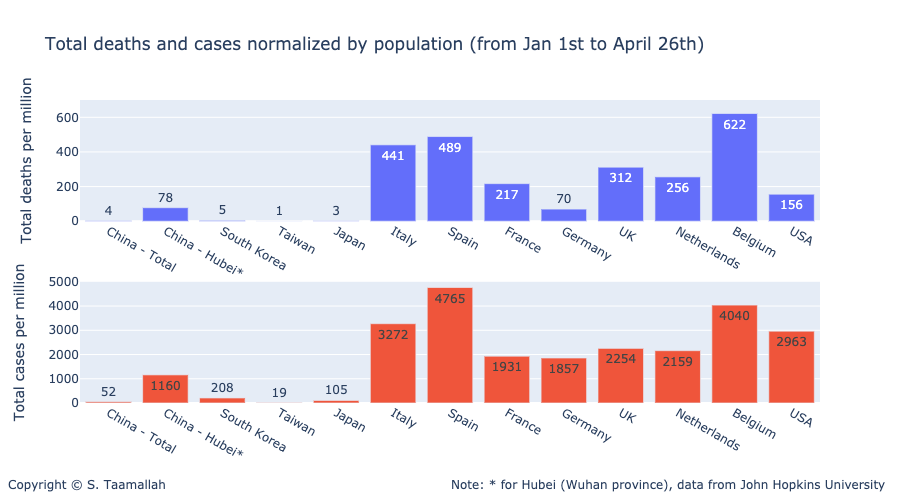

'STaamallah_covid19_analysis_chart_7_20200426.html'

In [47]:


#df_dict = pd.DataFrame.from_dict(Dict_deaths_normalized_by_pop)
import plotly.express as px
import plotly.graph_objects as go

data=[go.Bar(
            x=list(Dict_deaths_normalized_by_pop.keys()), y=list(Dict_deaths_normalized_by_pop.values()),
            text=list(Dict_deaths_normalized_by_pop.values()),
            textposition='auto',showlegend=False,),
      go.Bar(
            x=list(Dict_cases_normalized_by_pop.keys()), y=list(Dict_cases_normalized_by_pop.values()),
            text=list(Dict_cases_normalized_by_pop.values()),
            textposition='auto',
            xaxis='x3',
            yaxis='y5',
            showlegend=False)
     ]

layout = go.Layout(
    title='Total deaths and cases normalized by population (from Jan 1st to April 26th)',
    legend=dict(x=.1, y=1.15, orientation="h"), 
    width=900,
    height=500,
    
    annotations=[
        dict(
            x=1.09,
            y=-0.3,
            showarrow=False,
            text='Note: * for Hubei (Wuhan province), data from John Hopkins University',
            xref='paper',
            yref='paper'
        ),
        
        dict(
            x=-0.1,
            y=-0.3,
            showarrow=False,
            text='Copyright © S. Taamallah ',
            xref='paper',
            yref='paper'
        )
    ],
    
    # Top left
    xaxis=dict(
        title='',
        domain=[0, 1],
        range=['2020-01-15', '2020-04-15'],
    ),
    yaxis=dict(
        title='Total deaths per million',
        #type='log',
        range=[0,700],
        domain=[0.6, 1],
        anchor='x'
    ),
    yaxis2=dict(
        title = 'Total deaths per million',
        #type='log',
        range=[0,5000],
        overlaying='y',
        side='right'
    ),
    

    # middle left
    xaxis3=dict(
        title='',
        range=['2020-01-15', '2020-04-15'],
        domain=[0, 1],
        anchor='y5'
    ),
    yaxis5=dict(
        #type='log',
        title = 'Total cases per million',
        domain=[0, 0.4],
        range=[0,5000],
        anchor='x3'
    ),
    yaxis6=dict(
        title = 'Total cases per million',
        domain=[0.375, 0.625],
        overlaying='y5',
        range=[-600,600],
        side='right',
        anchor='x3'
    ),
   
)

fig = go.Figure(data=data, layout=layout)

fig.show()

from plotly.offline import plot
plot(fig, filename="STaamallah_covid19_analysis_chart_7_20200426.html", auto_open = False)




<a id="one"></a>
# 2 - Covid-19 daily death rate evolution



- While most countries implemented a form of social distancing in March 2020, the covid-19 daily death toll continues to rise in Europe and the United States. The number of deaths per day was the highest in Italy then Spain and to a lesser extent in France, during the month of March. The first days of April mark a notable change with a sharp rise in daily deaths in the USA and the UK. The former sadly became the first country to burry more than a 1000 of its citizen in 24 hours due to the coronavirus. 

- Italy and Spain are showing a few signs of incremental death slowdown. Are we getting close to the peak in those countries ?

- Looking at China, the first country hit by the coronavirus, and where the epidemic is now over can provide us with some clues.

In [48]:
# function to smooth the data 

def smooth_3day(data):
    triangle=[1,1,1]
    smoothed=np.zeros(len(data))
    for i in range(1, len(data)-2):
        point=data[i-1:i-1+len(triangle)] * triangle
        smoothed[i] = int(np.sum(point)/np.sum(triangle))
       
        
    # Handle boundaries
    #smoothed[1] = (data[0]+data[1]+data[2]) / 3
    smoothed[0] = (data[0])
    #smoothed[1] = (data[1])

    #smoothed[-1] = (data[-1]+data[-2]) / 2
    smoothed[-1] = (data[-1]+data[-2]) / 2
    
    return smoothed

In [49]:
# function to smooth the data 

def smooth_5day(data):
    triangle=[1,1,1,1,1]
    smoothed=np.zeros(len(data))
    for i in range(2, len(data)-3):
        point=data[i-2:i-2+len(triangle)] * triangle
        smoothed[i] = int(np.sum(point)/np.sum(triangle))
       
        
    # Handle boundaries
    smoothed[0] = (data[0]+data[1]+data[2]) / 3
    smoothed[1] = (data[0]+data[1]+data[2]+data[3]) / 4
    smoothed[-1] = (data[-1]+data[-2]+data[-3]) / 3
    smoothed[-2] = (data[-1]+data[-2]+data[-3]+data[-4]) / 4

    return smoothed

In [50]:
# function to smooth the data 

def smooth_7day(data):
    triangle=[1,1,1,1,1,1,1]
    smoothed=np.zeros(len(data))
    for i in range(3, len(data)-4):
        point=data[i-3:i-3+len(triangle)] * triangle
        smoothed[i] = int(np.sum(point)/np.sum(triangle)) 
        
    # Handle boundaries
    smoothed[0] = (data[0]+data[1]+data[2]) / 3
    smoothed[1] = (data[0]+data[1]+data[2]) / 3
    smoothed[2] = (data[0]+data[1]+data[2]+data[3]) / 4

    smoothed[-1] = (data[-1]+data[-2]+data[-3]) / 3
    smoothed[-2] = (data[-1]+data[-2]+data[-3]+data[-4]) / 4
    smoothed[-3] = (data[-1]+data[-2]+data[-3]+data[-5]) / 5
   
    return smoothed

In [51]:
def smoothTriangle(data, degree):
    triangle=np.concatenate((np.arange(degree + 1), np.arange(degree)[::-1])) # up then down
    smoothed=np.zeros(len(data))
    for i in range(degree, len(data) - degree):
        point=data[i-degree:i-degree+len(triangle)] * triangle
        smoothed[i] = int(np.sum(point)/np.sum(triangle))
       
        
    # Handle boundaries
    smoothed[:degree] = data[:degree]
    #smoothed[1] = (1*data[0] + 2*data[1] + 1*data[2])/4
    #smoothed[0] = (2*data[0]+1*data[1])/3
    smoothed[-degree:] = data[-degree:]
    #smoothed[-2] = (1*data[-3] + 2*data[-2] + 1*data[-1])/4
    #smoothed[-1] = (1*data[-2] + 2*data[-1])/3
    return smoothed

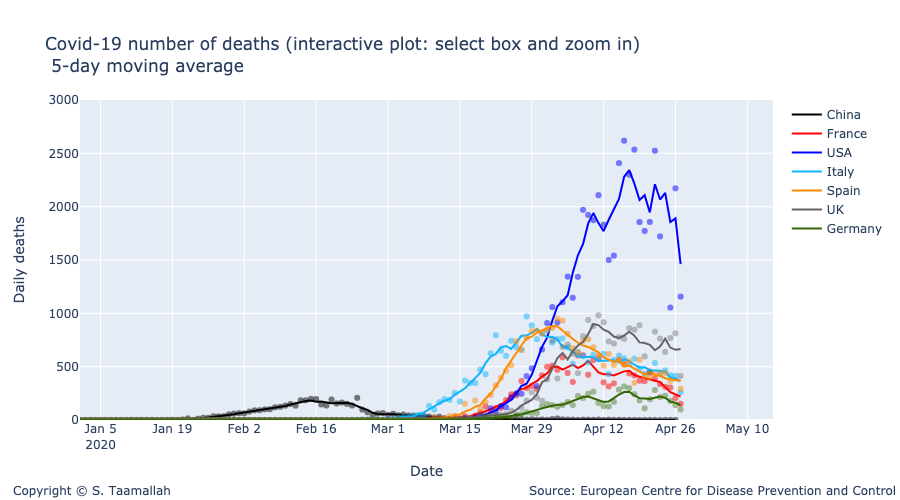

'STaamallah_covid19_analysis_chart_1_20200426.html'

In [52]:
degree = 1
#smooth_italy = smoothTriangle(df_italy['deaths'],degree)





smooth_china = smooth_3day(df_china['deaths'])
smooth_france = smooth_3day(df_france['deaths'])
smooth_italy = smooth_3day(df_italy['deaths'])
smooth_usa = smooth_3day(df_usa['deaths'])
smooth_uk = smooth_3day(df_uk['deaths'])
smooth_germany = smooth_3day(df_germany['deaths'])
smooth_spain = smooth_3day(df_spain['deaths'])
smooth_korea = smooth_3day(df_korea['deaths'])
smooth_netherlands = smooth_3day(df_netherlands['deaths'])
smooth_belgium = smooth_3day(df_belgium['deaths'])

smooth_china = smoothTriangle(df_china['deaths'], degree)
smooth_france = smoothTriangle(df_france['deaths'], degree)
smooth_italy = smoothTriangle(df_italy['deaths'],degree)
smooth_usa = smoothTriangle(df_usa['deaths'],degree)
smooth_uk = smoothTriangle(df_uk['deaths'],degree)
smooth_germany = smoothTriangle(df_germany['deaths'],degree)
smooth_spain = smoothTriangle(df_spain['deaths'],degree)
smooth_korea = smoothTriangle(df_korea['deaths'],degree)
smooth_netherlands = smoothTriangle(df_netherlands['deaths'],degree)
smooth_belgium = smoothTriangle(df_belgium['deaths'],degree)

smooth_china = smooth_5day(df_china['deaths'])
smooth_france = smooth_5day(df_france['deaths'])
smooth_italy = smooth_5day(df_italy['deaths'])
smooth_usa = smooth_5day(df_usa['deaths'])
smooth_uk = smooth_5day(df_uk['deaths'])
smooth_germany = smooth_5day(df_germany['deaths'])
smooth_spain = smooth_5day(df_spain['deaths'])
smooth_korea = smooth_5day(df_korea['deaths'])
smooth_netherlands = smooth_5day(df_netherlands['deaths'])
smooth_belgium = smooth_5day(df_belgium['deaths'])




# Add traces
trace1 = go.Scatter(
        x=df_china.index, 
        y=df_china['deaths'],
        mode='markers',
        name='China daily cases',
        line_color='rgba(0, 0, 0, 0.5)',
        showlegend=False,
)

trace11 = go.Scatter(
        x=df_china.index, 
        y=smooth_china,
        mode='lines',
        name='China',
        line_color='rgba(0, 0, 0, 1)',
)


trace2 = go.Scatter(
        x=df_france.index, 
        y=df_france['deaths'],
        mode='markers',
        name='France',
        line_color='rgba(256, 0, 0, .5)',
        showlegend=False,
)

trace22 = go.Scatter(
        x=df_france.index, 
        y=smooth_france,
        mode='lines',
        name='France',
        line_color='rgba(256, 0, 0, 1)',
)


trace3 = go.Scatter(
        x=df_usa.index, 
        y=df_usa['deaths'],
        mode='markers',
        name='USA',
        line_color='rgba(0, 0, 255, .5)',
    showlegend=False,
)

trace33 = go.Scatter(
        x=df_usa.index, 
        y=smooth_usa,
        mode='lines',
        name='USA',
        line_color='rgba(0, 0, 255, 1)',
)

trace4 = go.Scatter(
        x=df_italy.index, 
        y=df_italy['deaths'],
        mode='markers',
        name='Italy',
        line_color='rgba(14, 180, 252, .5)',
    showlegend=False,
)

trace44 = go.Scatter(
        x=df_italy.index, 
        y=smooth_italy,
        mode='lines',
        name='Italy',
        line_color='rgba(14, 180, 252, 1)',
)

trace5 = go.Scatter(
        x=df_spain.index, 
        y=df_spain['deaths'],
        mode='markers',
        name='Spain',
        line_color='rgba(255, 137, 0, .5)',
    showlegend=False,
)

trace55 = go.Scatter(
        x=df_spain.index, 
        y=smooth_spain,
        mode='lines',
        name='Spain',
        line_color='rgba(256, 137, 0, 1)',
)


trace6 = go.Scatter(
        x=df_uk.index, 
        y=df_uk['deaths'],
        mode='markers',
        name='UK',
        line_color='rgba(100, 100, 100, .4)',
    showlegend=False
)

trace66 = go.Scatter(
        x=df_uk.index, 
        y=smooth_uk,
        mode='lines',
        name='UK',
        line_color='rgba(100, 100, 100, 1)',
)

trace7 = go.Scatter(
        x=df_germany.index, 
        y=df_germany['deaths'],
        mode='markers',
        name='Germany',
        line_color='rgba(51, 102, 0, .4)',
    showlegend=False,
)

trace77 = go.Scatter(
        x=df_germany.index, 
        y=smooth_germany,
        mode='lines',
        name='Germany',
        line_color='rgba(51, 102, 0, 1)',
)


data = [trace1,trace11, trace2, trace22, trace3, trace33, trace4, trace44, trace5, trace55, trace6, trace66, trace7, trace77]

layout = go.Layout(
    title="Covid-19 number of deaths (interactive plot: select box and zoom in) <br> 5-day moving average",
    width=900,
    height=500,
    
    # Top left
    xaxis=dict(
        title='Date',
        range=['2020-01-01', '2020-05-15'],
    ),
    yaxis=dict(
        title='Daily deaths',
        #type='log',
        range=[0,3000],
        anchor='x'
    ),
    
      annotations=[
        dict(
            x=1.18,
            y=-0.25,
            showarrow=False,
            text='Source: European Centre for Disease Prevention and Control',
            xref='paper',
            yref='paper'
        ),
        
        dict(
            x=-0.1,
            y=-0.25,
            showarrow=False,
            text='Copyright © S. Taamallah ',
            xref='paper',
            yref='paper'
        )
    ],
    
)

fig = go.Figure(data=data, layout=layout)
fig.show()
from plotly.offline import plot
plot(fig, filename="STaamallah_covid19_analysis_chart_1_20200426.html", auto_open = False)




### Focus on Europe:

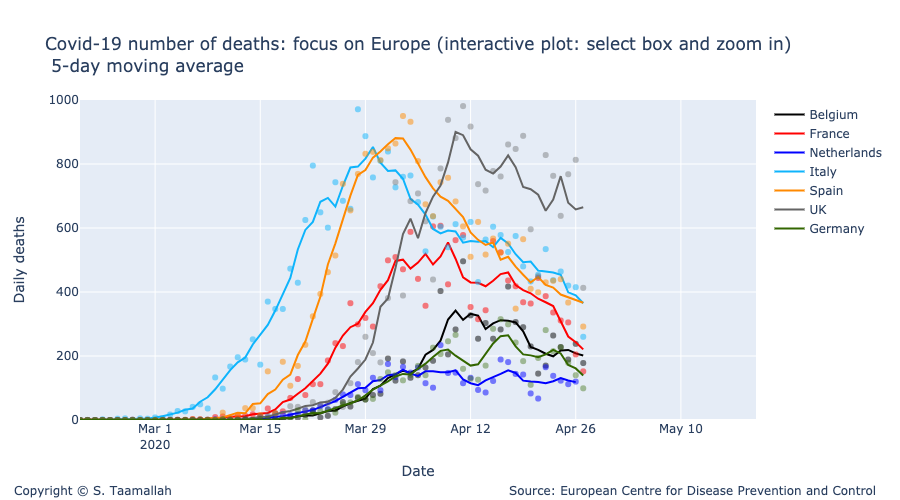

'STaamallah_covid19_analysis_chart_1bis_20200426.html'

In [53]:
# Add traces
trace1 = go.Scatter(
        x=df_belgium.index, 
        y=df_belgium['deaths'],
        mode='markers',
        name='Belgium daily cases',
        line_color='rgba(0, 0, 0, 0.5)',
        showlegend=False,
)

trace11 = go.Scatter(
        x=df_belgium.index, 
        y=smooth_belgium,
        mode='lines',
        name='Belgium',
        line_color='rgba(0, 0, 0, 1)',
)


trace3 = go.Scatter(
        x=df_netherlands.index, 
        y=df_netherlands['deaths'],
        mode='markers',
        name='Netherlands',
        line_color='rgba(0, 0, 255, .5)',
    showlegend=False,
)

trace33 = go.Scatter(
        x=df_netherlands.index, 
        y=smooth_netherlands,
        mode='lines',
        name='Netherlands',
        line_color='rgba(0, 0, 255, 1)',
)


data2 = [trace1,trace11, trace2, trace22, trace3, trace33, trace4, trace44, trace5, trace55, trace6, trace66, trace7, trace77]


layout2 = go.Layout(
    title="Covid-19 number of deaths: focus on Europe (interactive plot: select box and zoom in) <br> 5-day moving average",
    width=900,
    height=500,
    
    # Top left
    xaxis=dict(
        title='Date',
        range=['2020-02-20', '2020-05-20'],
    ),
    yaxis=dict(
        title='Daily deaths',
        #type='log',
        range=[0,1000],
        anchor='x'
    ),
    
      annotations=[
        dict(
            x=1.18,
            y=-0.25,
            showarrow=False,
            text='Source: European Centre for Disease Prevention and Control',
            xref='paper',
            yref='paper'
        ),
        
        dict(
            x=-0.1,
            y=-0.25,
            showarrow=False,
            text='Copyright © S. Taamallah ',
            xref='paper',
            yref='paper'
        )
    ],
    
)

fig = go.Figure(data=data2, layout=layout2)
fig.show()
from plotly.offline import plot
plot(fig, filename="STaamallah_covid19_analysis_chart_1bis_20200426.html", auto_open = False)




<a id="two"></a>
# 2 - China's case

In [54]:
# function to smooth the data 

def smooth_9day(data):
    triangle=[1,1,1,1,1,1,1,1,1]
    smoothed=np.zeros(len(data))
    for i in range(4, len(data)-5):
        point=data[i-4:i-4+len(triangle)] * triangle
        smoothed[i] = int(np.sum(point)/np.sum(triangle)) 
        
    # Handle boundaries
    smoothed[0] = (data[0]+data[1]+data[2]) / 3
    smoothed[1] = (data[0]+data[1]+data[2]+data[3]) / 4
    smoothed[2] = (data[0]+data[1]+data[2]+data[3]+data[4]) / 5
    smoothed[3] = (data[0]+data[1]+data[2]+data[3]+data[4]+data[5]) / 6

    smoothed[-1] = (data[-1]+data[-2]+data[-3]) / 3
    smoothed[-2] = (data[-1]+data[-2]+data[-3]+data[-4]) / 4
    smoothed[-3] = (data[-1]+data[-2]+data[-3]+data[-5]) / 5
    smoothed[-4] = (data[-1]+data[-2]+data[-3]+data[-5]+data[-6]) / 6
   
    return smoothed

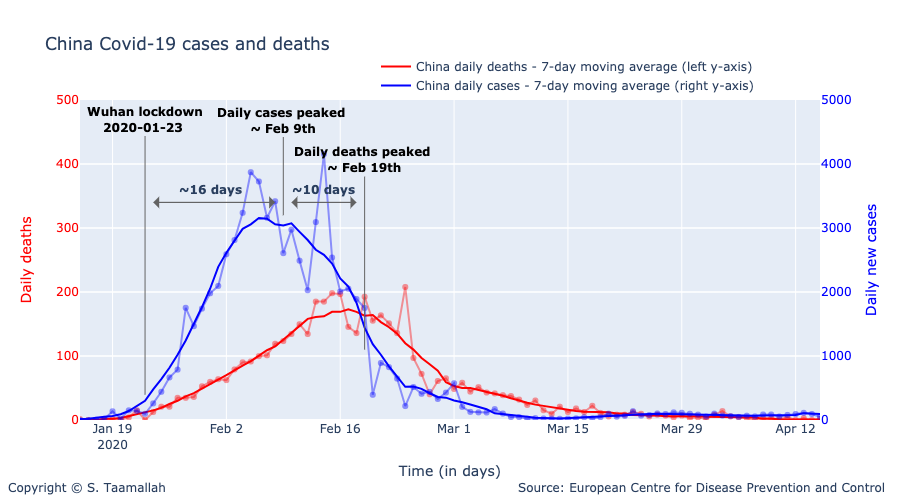

'STaamallah_covid19_analysis_chart_2_20200426.html'

In [55]:
degree = 5

smooth_china_deaths = smoothTriangle(df_china['deaths'],degree)
smooth_china_cases = smoothTriangle(df_china['cases'],degree)

smooth_china_deaths_9day = smooth_9day(df_china['deaths'])
smooth_china_cases_9day = smooth_9day(df_china['cases'])



# Add traces
trace1 = go.Scatter(
        x=df_china.index, 
        y=df_china['deaths'],
        mode='lines + markers',
        name='China daily deaths (left y-axis)',
        line_color='rgba(256, 0, 0, .4)',
        showlegend=False,
)

trace11 = go.Scatter(
        x=df_china.index, 
        y=smooth_china_deaths_9day,
        mode='lines',
        name='China daily deaths - 7-day moving average (left y-axis)',
        line_color='rgba(256, 0, 0, 1)',
)


trace2 = go.Scatter(
        x=df_china.index, 
        y=df_china['cases'],
        mode='lines + markers',
        name='China daily cases (right y-axis)',
        line_color='rgba(0, 0, 256, .4)',
        showlegend=False,
        yaxis='y2'
)

trace22 = go.Scatter(
        x=df_china.index, 
        y=smooth_china_cases_9day,
        mode='lines',
        name='China daily cases - 7-day moving average (right y-axis)',
        line_color='rgba(0, 0, 256, 1)',
        yaxis='y2'
)

data = [trace1, trace11, trace2, trace22]

layout = go.Layout(
    title='China Covid-19 cases and deaths',
    legend=dict(x=.4, y=1.15, orientation="h"), 
    width=900,
    height=500,
    
    # Top left
    xaxis=dict(
        title='Time (in days)',
        range=['2020-01-15', '2020-04-15'],
    ),
    yaxis=dict(
        title='Daily deaths',
        #type='log',
        range=[0,500],
        color="red",
        anchor='x'
    ),
    yaxis2=dict(
        title = 'Daily new cases',
        color='rgba(0, 0, 256, 1)',
        #type='log',
        range=[0,5000],
        overlaying='y',
        side='right'
    ),
    
       annotations=[
        dict(
            x=1.09,
            y=-0.24,
            showarrow=False,
            text='Source: European Centre for Disease Prevention and Control',
            xref='paper',
            yref='paper'
        ),
        
        dict(
            x=-0.1,
            y=-0.24,
            showarrow=False,
            text='Copyright © S. Taamallah ',
            xref='paper',
            yref='paper'
        )
    ],
    
)



fig = go.Figure(data=data, layout=layout)

fig.add_annotation(
            x='2020-01-23',
            y=40,
            xref="x",
            yref="y",
            text="<b> Wuhan lockdown <br> 2020-01-23  </b>",
            showarrow=True,
            font=dict(
            #family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=0,
        ay=-275,
)




fig.add_annotation(
            x='2020-02-09',
            y=320,
            text="<b>Daily cases peaked <br> ~ Feb 9th </b>",
            showarrow=True,
            font=dict(
            #family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=0,
        ay=-95,
)


fig.add_annotation(
            x='2020-02-19',
            y=110,
            text="<b>Daily deaths peaked <br> ~ Feb 19th </b>",
            showarrow=True,
            font=dict(
            #family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=0,
        ay=-190,
)

fig.add_annotation(
            x='2020-02-10',
            y=340,
            text="",
            showarrow=True,
            font=dict(
            #family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=1,
        arrowsize=2,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=65,
        ay=0,
)

fig.add_annotation(
            x='2020-02-18',
            y=340,
            text="",
            showarrow=True,
            font=dict(
            #family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=1,
        arrowsize=2,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=-65,
        ay=0,
)

fig.add_annotation(
            x='2020-02-14',
            y=360,
            text="<b> ~10 days </b>",
            showarrow=False,
)

fig.add_annotation(
            x='2020-01-24',
            y=340,
            text="",
            showarrow=True,
            font=dict(
            #family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=1,
        arrowsize=2,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=120,
        ay=0,
)

fig.add_annotation(
            x='2020-02-08',
            y=340,
            text="",
            showarrow=True,
            font=dict(
            #family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=1,
        arrowsize=2,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=-120,
        ay=0,
)


fig.add_annotation(
            x='2020-01-31',
            y=360,
            text="<b> ~16 days </b>",
            showarrow=False,
)

fig.show()

from plotly.offline import plot
plot(fig, filename="STaamallah_covid19_analysis_chart_2_20200426.html", auto_open = False)


- Wuhan implemented a full lockdown as early as in january 23rd. At that point, very few people died from the Covid-19 in China and about 500 people tested positive to the virus. The number of cases kept rising sharply in the days after the lockdown measures and an inflection point was observed on Feb 1st, leading to a number of daily cases plateau'ing and reaching a maximum 16 days after the lockdown. The plateau's mid point could be located around february 9th 2020. Meanwhile, the number of death continued to increase and only reached its peak 10 days after the number of daily cases reached its maximum level. 

- 16 and 10 days, those are the two numbers to keep in mind. Of course, it is also important to note that the peak is closer to a plateau and this plateau lasted for about 10 days in China. The peak dates we are extracting here are the mid points of each plateau. Identification of inflection points and peaks are shown in Apprendix.

<a id="three"></a>
# 3 - Daily cases in Europe and U.S. and when can we expect the peak of the pandemic ?





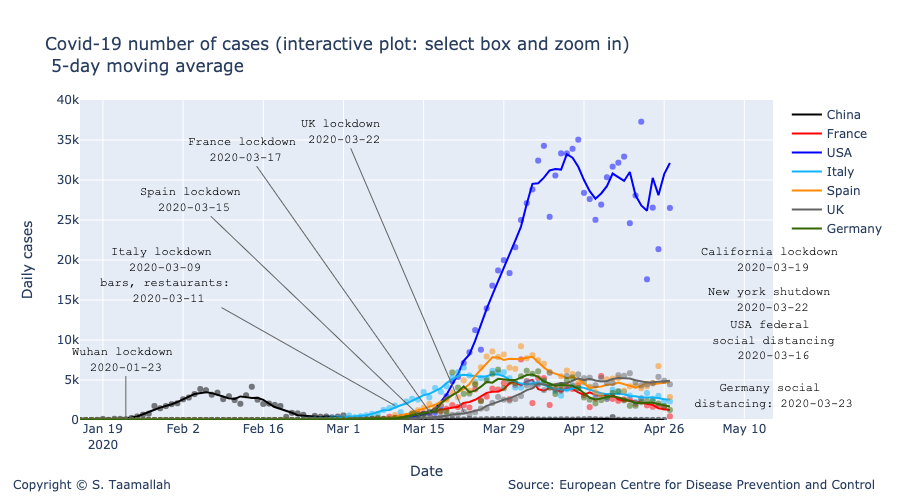

'STaamallah_covid19_analysis_chart_3_20200426.html'

In [56]:
degree = 1
#smooth_italy = smoothTriangle(df_italy['deaths'],degree)

smooth_china = smoothTriangle(df_china['cases'], degree)
smooth_france = smoothTriangle(df_france['cases'], degree)
smooth_italy = smoothTriangle(df_italy['cases'],degree)
smooth_usa = smoothTriangle(df_usa['cases'],degree)
smooth_uk = smoothTriangle(df_uk['cases'],degree)
smooth_germany = smoothTriangle(df_germany['cases'],degree)
smooth_spain = smoothTriangle(df_spain['cases'],degree)
smooth_korea = smoothTriangle(df_korea['cases'],degree)
smooth_netherlands = smoothTriangle(df_netherlands['cases'],degree)
smooth_belgium = smoothTriangle(df_belgium['cases'],degree)


smooth_china = smooth_3day(df_china['cases'])
smooth_france = smooth_3day(df_france['cases'])
smooth_italy = smooth_3day(df_italy['cases'])
smooth_usa = smooth_3day(df_usa['cases'])
smooth_uk = smooth_3day(df_uk['cases'])
smooth_germany = smooth_3day(df_germany['cases'])
smooth_spain = smooth_3day(df_spain['cases'])
smooth_korea = smooth_3day(df_korea['cases'])
smooth_netherlands = smooth_3day(df_netherlands['cases'])
smooth_belgium = smooth_3day(df_belgium['cases'])

smooth_china = smooth_5day(df_china['cases'])
smooth_france = smooth_5day(df_france['cases'])
smooth_italy = smooth_5day(df_italy['cases'])
smooth_usa = smooth_5day(df_usa['cases'])
smooth_uk = smooth_5day(df_uk['cases'])
smooth_germany = smooth_5day(df_germany['cases'])
smooth_spain = smooth_5day(df_spain['cases'])
smooth_korea = smooth_5day(df_korea['cases'])
smooth_netherlands = smooth_5day(df_netherlands['cases'])
smooth_belgium = smooth_5day(df_belgium['cases'])



# Add traces
trace1 = go.Scatter(
        x=df_china.index, 
        y=df_china['cases'],
        mode='markers',
        name='China daily cases',
        line_color='rgba(0, 0, 0, .5)',
        showlegend=False,
)

trace11 = go.Scatter(
        x=df_china.index, 
        y=smooth_china,
        mode='lines',
        name='China',
        line_color='rgba(0, 0, 0, 1)',
)


trace2 = go.Scatter(
        x=df_france.index, 
        y=df_france['cases'],
        mode='markers',
        name='France',
        line_color='rgba(256, 0, 0, .5)',
        showlegend=False,
)

trace22 = go.Scatter(
        x=df_france.index, 
        y=smooth_france,
        mode='lines',
        name='France',
        line_color='rgba(256, 0, 0, 1)',
)


trace3 = go.Scatter(
        x=df_usa.index, 
        y=df_usa['cases'],
        mode='markers',
        name='USA',
        line_color='rgba(0, 0, 255, .5)',
    showlegend=False,
)

trace33 = go.Scatter(
        x=df_usa.index, 
        y=smooth_usa,
        mode='lines',
        name='USA',
        line_color='rgba(0, 0, 255, 1)',
)
    
    
trace4 = go.Scatter(
        x=df_italy.index, 
        y=df_italy['cases'],
        mode='markers',
        name='Italy',
        line_color='rgba(14, 180, 252, .5)',
    showlegend=False,
)

trace44 = go.Scatter(
        x=df_italy.index, 
        y=smooth_italy,
        mode='lines',
        name='Italy',
        line_color='rgba(14, 180, 252, 1)',
)

trace5 = go.Scatter(
        x=df_spain.index, 
        y=df_spain['cases'],
        mode='markers',
        name='Spain',
        line_color='rgba(255, 137, 0, .5)',
    showlegend=False,
)

trace55 = go.Scatter(
        x=df_spain.index, 
        y=smooth_spain,
        mode='lines',
        name='Spain',
        line_color='rgba(255, 137, 0, 1)',
)


trace6 = go.Scatter(
        x=df_uk.index, 
        y=df_uk['cases'],
        mode='markers',
        name='UK',
        line_color='rgba(100, 100, 100, .5)',
    showlegend=False
)

trace66 = go.Scatter(
        x=df_uk.index, 
        y=smooth_uk,
        mode='lines',
        name='UK',
        line_color='rgba(100, 100, 100, 1)',
)

trace7 = go.Scatter(
        x=df_germany.index, 
        y=df_germany['cases'],
        mode='markers',
        name='Germany',
        line_color='rgba(51, 102, 0, .5)',
    showlegend=False,
)

trace77 = go.Scatter(
        x=df_germany.index, 
        y=smooth_germany,
        mode='lines',
        name='Germany',
        line_color='rgba(51, 102, 0, 1)',
)


data = [trace1,trace11, trace2, trace22, trace3, trace33, trace4, trace44, trace5, trace55, trace6, trace66, trace7, trace77]

layout = go.Layout(
    title="Covid-19 number of cases (interactive plot: select box and zoom in) <br> 5-day moving average",
    width=900,
    height=500,
    
    # Top left
    xaxis=dict(
        title='Date',
        range=['2020-01-15', '2020-05-15'],
    ),
    yaxis=dict(
        title='Daily cases',
        #type='log',
        range=[0,40000],
        anchor='x'
    ),
    
      annotations=[
        dict(
            x=1.15,
            y=-0.23,
            showarrow=False,
            text='Source: European Centre for Disease Prevention and Control',
            xref='paper',
            yref='paper'
        ),
        
        dict(
            x=-0.1,
            y=-0.23,
            showarrow=False,
            text='Copyright © S. Taamallah ',
            xref='paper',
            yref='paper'
        )
    ],
    
)



fig = go.Figure(data=data, layout=layout)



fig.add_annotation(
        x='2020-01-23',
        y=20,
        xref="x",
        yref="y",
        text="Wuhan lockdown <br> 2020-01-23 ",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="black"
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=0,
        ay=-60,
        #bordercolor="#c7c7c7",
        #borderwidth=2,
        #borderpad=4,
        #bgcolor="#ff7f0e",
        #opacity=0.8
        )


fig.add_annotation(
        x='2020-03-10',
        y=1800,
        xref="x",
        yref="y",
        text="Italy lockdown <br> 2020-03-09 <br> bars, restaurants: <br> 2020-03-11",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="black"
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=-230,
        ay=-130,
        #bordercolor="#c7c7c7",
        #borderwidth=2,
        #borderpad=4,
        #bgcolor="#ff7f0e",
        #opacity=0.8
        )


fig.add_annotation(
            x='2020-03-17',
            y=30,
            text="France lockdown <br> 2020-03-17 ",
            showarrow=True,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=-190,
        ay=-270,
)


fig.add_annotation(
            x='2020-03-15',
            y=20,
            text="Spain lockdown <br> 2020-03-15 ",
            showarrow=True,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=-230,
        ay=-220,
)


fig.add_annotation(
            x='2020-03-22',
            y=1000,
            text="UK lockdown <br> 2020-03-22 ",
            showarrow=True,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=-120,
        ay=-280,
)

fig.add_annotation(
            x='2020-05-15',
            y=3000,
            text="Germany social <br> distancing: 2020-03-23 ",
            showarrow=False,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=600,
        ay=-60,
)

fig.add_annotation(
            x='2020-05-15',
            y=10000,
            text="USA federal <br> social distancing <br> 2020-03-16 ",
            showarrow=False,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=600,
        ay=-520,
)

fig.add_annotation(
            x='2020-05-15',
            y=15000,
            text="New york shutdown <br> 2020-03-22 ",
            showarrow=False,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=600,
        ay=-420,
)



fig.add_annotation(
            x='2020-05-15',
            y=20000,
            text="California lockdown <br> 2020-03-19 ",
            showarrow=False,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=600,
        ay=-320,
)

fig.show()
from plotly.offline import plot
plot(fig, filename="STaamallah_covid19_analysis_chart_3_20200426.html", auto_open = False)

#from IPython.display import HTML, display
#display(HTML('STaamallah_covid19_analysis_chart_3_20200403.html'), metadata=dict(isolated=True))

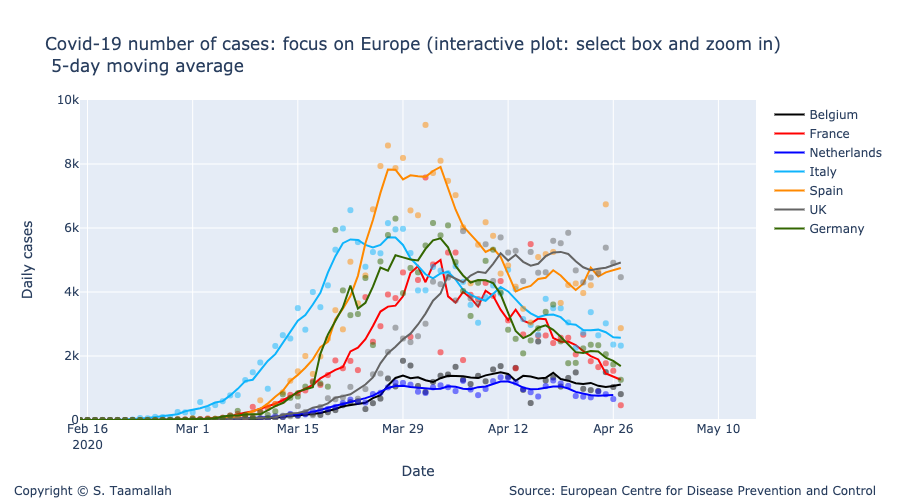

'STaamallah_covid19_analysis_chart_1bis_20200426.html'

In [57]:
# Add traces
trace1 = go.Scatter(
        x=df_belgium.index, 
        y=df_belgium['cases'],
        mode='markers',
        name='Belgium daily cases',
        line_color='rgba(0, 0, 0, 0.5)',
        showlegend=False,
)

trace11 = go.Scatter(
        x=df_belgium.index, 
        y=smooth_belgium,
        mode='lines',
        name='Belgium',
        line_color='rgba(0, 0, 0, 1)',
)


trace3 = go.Scatter(
        x=df_netherlands.index, 
        y=df_netherlands['cases'],
        mode='markers',
        name='Netherlands',
        line_color='rgba(0, 0, 255, .5)',
    showlegend=False,
)

trace33 = go.Scatter(
        x=df_netherlands.index, 
        y=smooth_netherlands,
        mode='lines',
        name='Netherlands',
        line_color='rgba(0, 0, 255, 1)',
)


data2 = [trace1,trace11, trace2, trace22, trace3, trace33, trace4, trace44, trace5, trace55, trace6, trace66, trace7, trace77]


layout2 = go.Layout(
    title="Covid-19 number of cases: focus on Europe (interactive plot: select box and zoom in) <br> 5-day moving average",
    width=900,
    height=500,
    
    # Top left
    xaxis=dict(
        title='Date',
        range=['2020-02-15', '2020-05-15'],
    ),
    yaxis=dict(
        title='Daily cases',
        #type='log',
        range=[0,10000],
        anchor='x'
    ),
    
      annotations=[
        dict(
            x=1.18,
            y=-0.25,
            showarrow=False,
            text='Source: European Centre for Disease Prevention and Control',
            xref='paper',
            yref='paper'
        ),
        
        dict(
            x=-0.1,
            y=-0.25,
            showarrow=False,
            text='Copyright © S. Taamallah ',
            xref='paper',
            yref='paper'
        )
    ],
    
)

fig = go.Figure(data=data2, layout=layout2)
fig.show()
from plotly.offline import plot
plot(fig, filename="STaamallah_covid19_analysis_chart_1bis_20200426.html", auto_open = False)





- Italy has been under a national lockdown since March 9th. If we consider here the 10th of March as the effective shutdown day and using a 16 day delay for the number of daily cases to peak (as derived from the China case above), we can expect a peak to be reached around March 26th. In Spain and in France, one can hope for a peak occuring 6 and 8 days later respectively i.e. April 1st and april 3rd. 

- It is interesting to see in the graph above that the number of daily cases in Italy has not increased since March 21nd and remained between 5000 and 6000 per day. A similar observation can be made in Spain with the number of new cases flat since March 27th. 

- If the number of cases indeed peaked in Italy and Spain, then we should expect a peak in the number of daily deaths in Italy around April 5th in Italy, April 11th in Spain and April 13th in France.

- Of course there is an important assumption here; we are assuming that the lockdown in different countries will have the same effect and delay. In reality the degree of stirctness of a lockdown depends on the country and a varying delay and plateau length and shape is to be expected.

#### <b> Number of Cases and deaths up to the lockdown or national quarantine date: (cases/deaths) </b>

In [58]:
print('China   : ' + str(int(sum(df_china['cases']['2020-01-24':]))) + "   / " + str(int(sum(df_china['deaths']['2020-01-24':]))))
print('Italy   : ' + str(int(sum(df_italy['cases']['2020-03-10':]))) + "  / " + str(int(sum(df_italy['deaths']['2020-03-10':]))))
print('Spain   : ' + str(int(sum(df_spain['cases']['2020-03-16':]))) + "  / " + str(int(sum(df_spain['deaths']['2020-03-16':]))))
print('France  : ' + str(int(sum(df_france['cases']['2020-03-18':]))) + "  / " + str(int(sum(df_france['deaths']['2020-03-18':]))))
print('Germany : ' + str(int(sum(df_germany['cases']['2020-03-24':]))) + " / " + str(int(sum(df_germany['deaths']['2020-03-24':]))))
print('UK      : ' + str(int(sum(df_uk['cases']['2020-03-23':]))) + "  / " + str(int(sum(df_uk['deaths']['2020-03-23':]))))
print('USA     : ' + str(int(sum(df_usa['cases']['2020-03-21':]))) + " / " + str(int(sum(df_usa['deaths']['2020-03-21':]))))
print('S.Korea : ' + str(int(sum(df_korea['cases']['2020-03-22':]))) + "  / " + str(int(sum(df_korea['deaths']['2020-03-22':]))))

China   : 882   / 36
Italy   : 9172  / 464
Spain   : 7753  / 288
France  : 7730  / 175
Germany : 29212 / 126
UK      : 5683  / 281
USA     : 19624 / 260
S.Korea : 8897  / 104


<a id="four"></a>
# 4 - Cases and deaths in China, France, USA, Tunisia, Italy and Spain

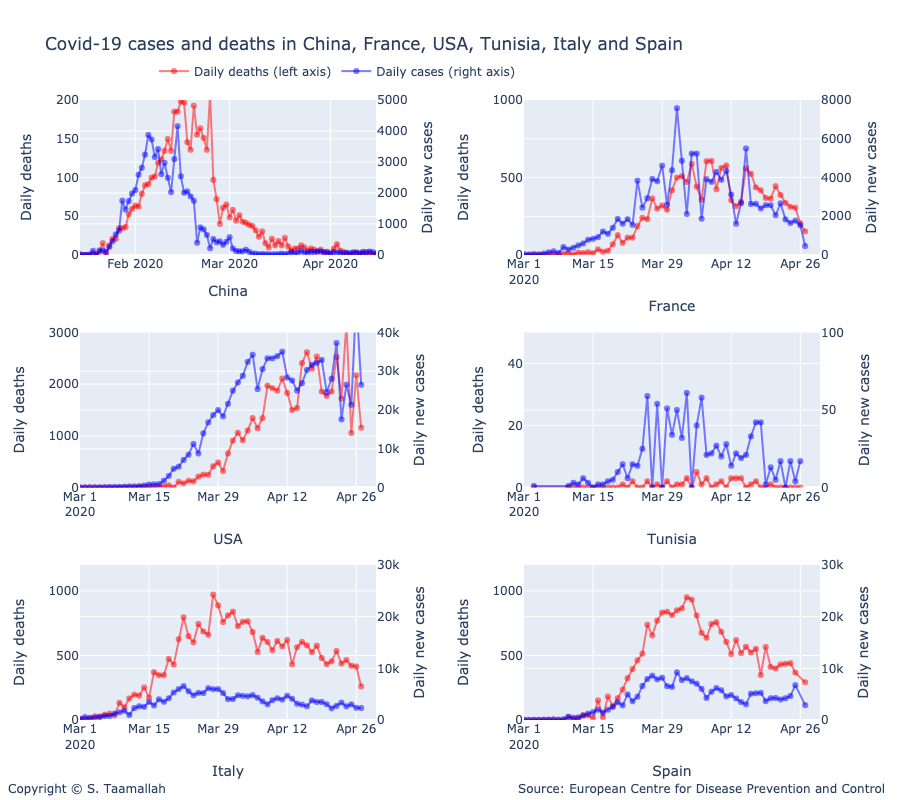

'STaamallah_covid19_analysis_chart_4_20200426.html'

In [59]:
#plotting number of cases and number of deaths for different countries
# all charts using same scale for ease of comparison
# number of death are on the left y-axis. 

# Add traces
trace1 = go.Scatter(
        x=df_china.index, 
        y=df_china['deaths'],
        mode='lines+markers',
        name='Daily deaths (left axis)',
        line_color='rgba(256, 0, 0, .5)',
)
trace2 = go.Scatter(
        x=df_china.index, 
        y=df_china['cases'],
        mode='lines+markers',
        name='Daily cases (right axis)',
        line_color='rgba(0, 0, 256, .5)',
        yaxis='y2'
)
trace3 = go.Scatter(
        x=df_france.index, 
        y=df_france['deaths'],
        mode='lines+markers',
        name='Daily deaths',
        showlegend=False,
        line_color='rgba(256, 0, 0, .5)',
        xaxis='x2',
        yaxis='y3'
)
trace4 = go.Scatter(
        x=df_france.index, 
        y=df_france['cases'],
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, .5)',
        xaxis='x2',
        yaxis='y4',
        showlegend=False,
)
trace5 = go.Scatter(
        x=df_usa.index, 
        y=df_usa['deaths'],
        mode='lines+markers',
        name='Daily deaths',
        line_color='rgba(256, 0, 0, .5)',
        xaxis='x3',
        yaxis='y5',
        showlegend=False,
)
trace6 = go.Scatter(
        x=df_usa.index, 
        y=df_usa['cases'],
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, .5)',
        xaxis='x3',
        yaxis='y6',
        showlegend=False,
)
trace7 = go.Scatter(
        x=df_tunisia.index, 
        y=df_tunisia['deaths'],
        mode='lines+markers',
        name='Daily deaths',
        line_color='rgba(256, 0, 0, .5)',
        xaxis='x4',
        yaxis='y7',
        showlegend=False,
)
trace8 = go.Scatter(
        x=df_tunisia.index, 
        y=df_tunisia['cases'],
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, .5)',
        xaxis='x4',
        yaxis='y8',
        showlegend=False,
)


trace9 = go.Scatter(
        x=df_italy.index, 
        y=df_italy['deaths'],
        mode='lines+markers',
        name='Daily deaths',
        line_color='rgba(256, 0, 0, .5)',
        xaxis='x5',
        yaxis='y9',
        showlegend=False,
)

trace10 = go.Scatter(
        x=df_italy.index, 
        y=df_italy['cases'],
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, .5)',
        xaxis='x5',
        yaxis='y10',
        showlegend=False,
)

trace11 = go.Scatter(
        x=df_spain.index, 
        y=df_spain['deaths'],
        mode='lines+markers',
        name='Daily deaths',
        line_color='rgba(256, 0, 0, .5)',
        xaxis='x6',
        yaxis='y11',
        showlegend=False,
)
trace12 = go.Scatter(
        x=df_spain.index, 
        y=df_spain['cases'],
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, .5)',
        xaxis='x6',
        yaxis='y12',
        showlegend=False,
)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12]

layout = go.Layout(
    title='Covid-19 cases and deaths in China, France, USA, Tunisia, Italy and Spain',
    legend=dict(x=.1, y=1.07, orientation="h"), 
    width=900,
    height=800,
    
    annotations=[
        dict(
            x=1.09,
            y=-0.125,
            showarrow=False,
            text='Source: European Centre for Disease Prevention and Control',
            xref='paper',
            yref='paper'
        ),
        
        dict(
            x=-0.1,
            y=-0.125,
            showarrow=False,
            text='Copyright © S. Taamallah ',
            xref='paper',
            yref='paper'
        )
    ],
    
    # Top left
    xaxis=dict(
        title='China',
        domain=[0, 0.4],
        range=['2020-01-15', '2020-04-15'],
    ),
    yaxis=dict(
        title='Daily deaths',
        #type='log',
        range=[0,200],
        domain=[0.75, 1],
        anchor='x'
    ),
    yaxis2=dict(
        title = 'Daily new cases',
        #type='log',
        range=[0,5000],
        overlaying='y',
        side='right'
    ),
    

    # Top right
    xaxis2=dict(
        title='France',
        range=['2020-03-01', '2020-04-30'],
        domain=[0.6, 1.0],
        anchor='y3'
    ),
    yaxis3=dict(
        #type='log',
        title = 'Daily deaths',
        domain=[0.75, 1],
        anchor='x2',
        range=[0,1000],

    ),
    yaxis4=dict(
        title = 'Daily new cases',
        domain=[0.6, 1.0],
        overlaying='y3',
        range=[0,8000],
        side='right',
        anchor='x2'
    ),

    # middle left
    xaxis3=dict(
        title='USA',
        range=['2020-03-01', '2020-04-30'],
        domain=[0, 0.4],
        anchor='y5'
    ),
    yaxis5=dict(
        #type='log',
        title = 'Daily deaths',
        domain=[0.375, 0.625],
        range=[0,3000],
        anchor='x3'
    ),
    yaxis6=dict(
        title = 'Daily new cases',
        domain=[0.375, 0.625],
        overlaying='y5',
        range=[0,40000],
        side='right',
        anchor='x3'
    ),

    # middle right
    xaxis4=dict(
        title='Tunisia',
        range=['2020-03-01', '2020-04-30'],
        domain=[0.6, 1.0],
        anchor='y7'
    ),
    yaxis7=dict(
        #type='log',
        title = 'Daily deaths',
        domain=[0.375, 0.625],
        range=[0,50],
        anchor='x4'
    ),
    yaxis8=dict(
        title = 'Daily new cases',
        domain=[0.375, 0.625],
        overlaying='y7',
        range=[0,100],
        side='right',
        anchor='x4'
    ),
    
    # Bottom left
    xaxis5=dict(
        title='Italy',
        range=['2020-03-01', '2020-04-30'],
        domain=[0, 0.4],
        anchor='y9'
    ),
    yaxis9=dict(
        #type='log',
        title = 'Daily deaths',
        domain=[0, 0.25],
        range=[0,1200],
        anchor='x5'
    ),
    yaxis10=dict(
        title = 'Daily new cases',
        domain=[0, 0.25],
        overlaying='y9',
        range=[0,30000],
        side='right',
        anchor='x5'
    ),
    
    # Bottom bottom right
    xaxis6=dict(
        title='Spain',
        range=['2020-03-01', '2020-04-30'],
        domain=[0.6, 1.0],
        anchor='y11'
    ),
    yaxis11=dict(
        #type='log',
        title = 'Daily deaths',
        domain=[0, 0.25],
        range=[0,1200],
        anchor='x6'
    ),
    yaxis12=dict(
        title = 'Daily new cases',
        domain=[0, 0.25],
        overlaying='y11',
        range=[0,30000],
        side='right',
        anchor='x6'
    )
    
)

    
fig = go.Figure(data=data, layout=layout)


fig.show()


#py.plot(data, filename = 'basic-line', auto_open=True)
#py.plot(data, filename='privacy-public', sharing='public')

from plotly.offline import plot
plot(fig, filename="STaamallah_covid19_analysis_chart_4_20200426.html", auto_open = False)

#from IPython.display import HTML, display
#display(HTML('STaamallah_covid19_analysis_chart_4_20200403.html'), metadata=dict(isolated=False))

---

Importante methodology notes: 

- Data reported here on a certain day reflects reality of the previous day. For instance, France's officials report data at 7:30 pm on national news (say april 6); this data reflects the 24 hours up to 2pm or 3 pm that same day (between april 5th aand april 6th). That data is reported in this analysis with a april 7th timestamp, following the ECDC reporting methodology.

- In the case of France, deaths occuring at hospitals were the only data reported. As of Friday april 3rd, deaths in nursing homes (EHPAD) started to be counted. However, historical nursing home figures were provided as a lump sum and details on when these occured were not provided. In this analysis, only hospital data is shown, as were are mostly interested in the shape of the curve rather than the absolute numbers. When there will be enough data on daily nursing home death toll, these will be added.

- In the UK, "The figures on deaths relate in almost all cases to patients who have died in hospital and who have tested positive for COVID-19" according to the UK Department of Health and Social Care.

- In the US, deaths occuring at home from coronavirus are not counted if a test was not performed prior to death.

---

<a id="appendix"></a>
# Appendix

<a id="appendix_A"></a>
### A - Locating peaks, inflection points and case-death delay

The upward and downward inflection points are extracted from the first derivative of the smoothed (7-day moving average) deaths and cases data arrays. The first derivative curve is also smoothed. Regarding the peak, it is extracted as the mid-point of the two inflection points. This will be validated by comparing it to 1st derivative curve crossing the y=0 axis. 

This leads to the following key dates for China:

- Lockdown
    - 2020-01-23: lockdown in Wuhan
    
    
- Cases curve:
    - 2020-01-30: Upward inflection point in cases.
    - 2020-02-18: Downward inflection point in cases. <br>
        => the mid point of the two inflection point can be estimated to be around feb 9th.
    - 2020-02-08: Peak in cases extracted from the 1st derivative crossing y=0.
    
    
- Deaths curve:
    - 2020-02-08: Upward inflection point in deaths.
    - 2020-02-26: Downward inflection point in deaths. <br>
        => the mid point of the two inflection point can be estimated to be around feb 17th.
    - 2020-02-17: Peak in deaths extracted from the 1st derivative crossing y=0.


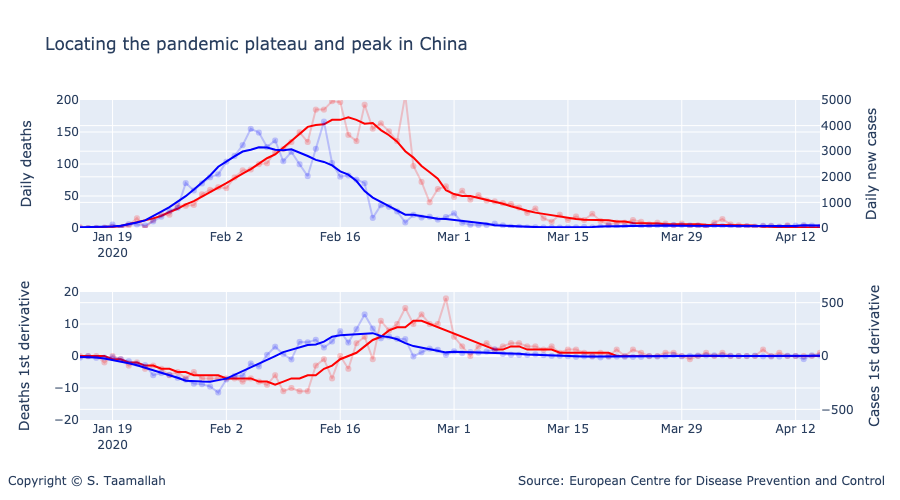

'STaamallah_covid19_analysis_chart_5_20200426.html'

In [60]:
shift = 1

smooth_china_diff_deaths = smooth_9day(np.diff(smooth_china_deaths_9day))
smooth_china_diff_cases = smooth_9day(np.diff(smooth_china_cases_9day))

#plotting number of cases and number of deaths for different countries
# all charts using same scale for ease of comparison
# number of death are on the left y-axis. 

# Add traces
trace1 = go.Scatter(
        x=df_china.index, 
        y=df_china['deaths'],
        mode='lines + markers',
        name='China daily deaths (left y-axis)',
        line_color='rgba(256, 0, 0, .2)',
        showlegend=False
)

trace11 = go.Scatter(
        x=df_china.index, 
        y=smooth_china_deaths_9day,
        mode='lines',
        name='China daily deaths - 7-day moving average (left y-axis)',
        line_color='rgba(256, 0, 0, 1)',
        showlegend=False
)


trace2 = go.Scatter(
        x=df_china.index, 
        y=df_china['cases'],
        mode='lines + markers',
        name='China daily cases (right y-axis)',
        line_color='rgba(0, 0, 256, .2)',
        showlegend=False,
        yaxis='y2',
)

trace22 = go.Scatter(
        x=df_china.index, 
        y=smooth_china_cases_9day,
        mode='lines',
        name='China daily cases - 7-day moving average (right y-axis)',
        line_color='rgba(0, 0, 256, 1)',
        yaxis='y2',
        showlegend=False
)



trace5 = go.Scatter(
        x=df_china.index, 
        y=np.diff(smooth_china_deaths_9day),
        mode='lines+markers',
        name='Daily deaths',
        line_color='rgba(256, 0, 0, .2)',
        xaxis='x3',
        yaxis='y5',
        showlegend=False
)
trace6 = go.Scatter(
        x=df_china.index, 
        y=np.diff(smooth_china_cases_9day),
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, 0.2)',
        xaxis='x3',
        yaxis='y6',
        showlegend=False
)

trace55 = go.Scatter(
        x=df_china.index, 
        y=smooth_china_diff_deaths,
        mode='lines',
        name='Daily deaths',
        line_color='rgba(256, 0, 0, 1)',
        xaxis='x3',
        yaxis='y5',
        showlegend=False
)
trace66 = go.Scatter(
        x=df_china.index, 
        y=smooth_china_diff_cases,
        mode='lines',
        name='Daily cases',
        line_color='rgba(0, 0, 256, 1)',
        xaxis='x3',
        yaxis='y6',
        showlegend=False
)



data = [trace1, trace2, trace11, trace22, trace5, trace6, trace55, trace66]

layout = go.Layout(
    title='Locating the pandemic plateau and peak in China',
    legend=dict(x=.1, y=1.15, orientation="h"), 
    width=900,
    height=500,
    
    annotations=[
        dict(
            x=1.09,
            y=-0.22,
            showarrow=False,
            text='Source: European Centre for Disease Prevention and Control',
            xref='paper',
            yref='paper'
        ),
        
        dict(
            x=-0.1,
            y=-0.22,
            showarrow=False,
            text='Copyright © S. Taamallah ',
            xref='paper',
            yref='paper'
        )
    ],
    
    # Top left
    xaxis=dict(
        title='',
        domain=[0, 1],
        range=['2020-01-15', '2020-04-15'],
    ),
    yaxis=dict(
        title='Daily deaths',
        #type='log',
        range=[0,200],
        domain=[0.6, 1],
        anchor='x'
    ),
    yaxis2=dict(
        title = 'Daily new cases',
        #type='log',
        range=[0,5000],
        overlaying='y',
        side='right'
    ),
    

    

    # middle left
    xaxis3=dict(
        title='',
        range=['2020-01-15', '2020-04-15'],
        domain=[0, 1],
        anchor='y5'
    ),
    yaxis5=dict(
        #type='log',
        title = 'Deaths 1st derivative',
        domain=[0, 0.4],
        range=[-20,20],
        anchor='x3'
    ),
    yaxis6=dict(
        title = 'Cases 1st derivative',
        domain=[0.375, 0.625],
        overlaying='y5',
        range=[-600,600],
        side='right',
        anchor='x3'
    ),
   
)

    
fig = go.Figure(data=data, layout=layout)


fig.show()


#py.plot(data, filename = 'basic-line', auto_open=True)
#py.plot(data, filename='privacy-public', sharing='public')

from plotly.offline import plot
plot(fig, filename="STaamallah_covid19_analysis_chart_5_20200426.html", auto_open = False)

#from IPython.display import HTML, display
#display(HTML('STaamallah_covid19_analysis_chart_4_20200403.html'), metadata=dict(isolated=False))

<a id="appendix_B"></a>

### B -  Are cases and deaths correlated ?

In [61]:
def xcorr(x, y, normed=True, detrend=False, maxlags=25):
    # Cross correlation of two signals of equal length
    # Returns the coefficients when normed=True
    # Returns inner products when normed=False
    # Usage: lags, c = xcorr(x,y,maxlags=len(x)-1)
    # Optional detrending e.g. mlab.detrend_mean

    Nx = len(x)
    if Nx != len(y):
        raise ValueError('x and y must be equal length')
    
    if detrend:
        import matplotlib.mlab as mlab
        x = mlab.detrend_mean(np.asarray(x)) # can set your preferences here
        y = mlab.detrend_mean(np.asarray(y))
    
    c = np.correlate(x, y, mode='full')

    if normed:
        n = np.sqrt(np.dot(x, x) * np.dot(y, y)) # this is the transformation function
        c = np.true_divide(c,n)

    if maxlags is None:
        maxlags = Nx - 1

    if maxlags >= Nx or maxlags < 1:
        raise ValueError('maglags must be None or strictly '
                         'positive < %d' % Nx)

    lags = np.arange(-maxlags, maxlags + 1)
    c = c[Nx - 1 - maxlags:Nx + maxlags]
    return lags, c

The correlation coeficient between the deaths and cases curves is plotted below. The lag (x axis) corresponds the a shift between the two curves: a lag of zero shows the correlation between the curves as they occured in reality. A lag of 7 days shows the correlation between the two curve if one is shifted by 7 days. The maximum correlation for a lag between 7 and 10 days means that deaths and cases are highly correlated but with a 7-10 delay. 

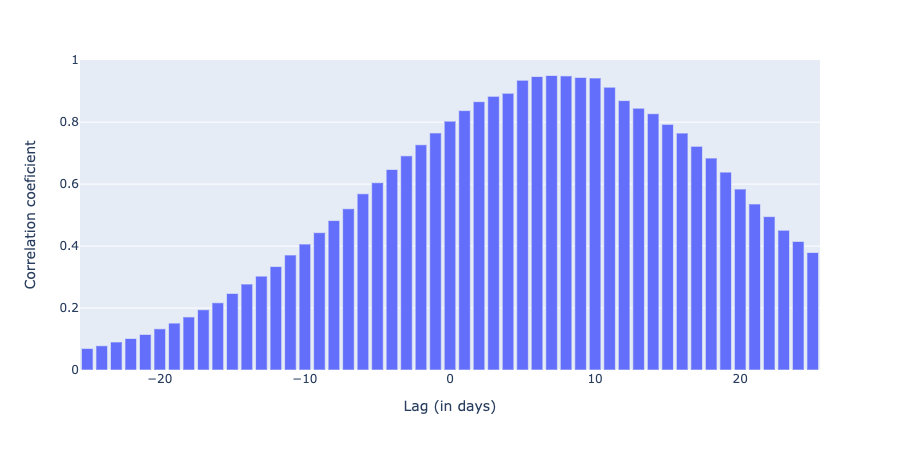

'STaamallah_covid19_analysis_chart_6_20200426.html'

In [62]:
import matplotlib.pyplot as plt
import numpy as np

#plt.xcorr(df_china['cases'], df_china['deaths'], usevlines=True, maxlags=30, normed=True, lw=2)
#plt.show()
#xcorr(df_china['cases'], df_china['deaths'])
[lag, coef] = xcorr(df_china['cases'], df_china['deaths'])
lag[np.argmax(coef)]

import plotly.express as px
fig = px.bar(x=lag, y = coef, labels={'x':'Lag (in days)', 'y':'Correlation coeficient'})
fig.show()

from plotly.offline import plot
plot(fig, filename="STaamallah_covid19_analysis_chart_6_20200426.html", auto_open = False)



<br>
<br>
Plotting the scatter plot of cases against deaths shifted earlier in time by 10 days shows this correlation visually:

/Users/lindseyholiday/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



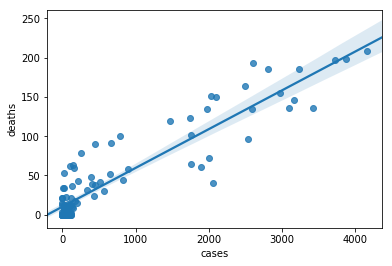

In [63]:
import seaborn as sns
shift = 10
sns.regplot(df_china['cases'][shift:], df_china['deaths'][:-shift])

